In [19]:
# importig libs

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor


from sklearn import model_selection
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix,accuracy_score
from sklearn.model_selection import GridSearchCV

# skip warning
from sklearn import preprocessing
import warnings
warnings.filterwarnings( action= 'ignore')

In [2]:
df = pd.read_csv('/content/drug200.csv')
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.keys()

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [5]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [42]:
df.describe()

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
count,199.000000,199.000000,199.000000,199.000000,199.00000,199.000000,199.000000,199.000000,199.000000
mean,44.447236,0.522613,15.978437,2.864322,0.38191,0.321608,0.296482,0.512563,0.487437
std,16.479739,0.500748,7.084385,1.373149,0.48708,0.468272,0.457858,0.501103,0.501103
min,15.000000,0.000000,6.269000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.000000,10.445000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,1.000000,13.935000,3.000000,0.00000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,1.000000,19.294500,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000
max,74.000000,1.000000,38.247000,4.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [12]:
df['Sex'].unique().tolist()

['F', 'M']

In [13]:
df['BP'].unique().tolist()
df['Cholesterol'].unique().tolist()

['HIGH', 'NORMAL']

In [14]:
df['Cholesterol'].unique().tolist()

['HIGH', 'NORMAL']

In [ ]:
df['Na_to_K'].unique().tolist()

In [16]:
df['Drug'].unique().tolist()

['DrugY', 'drugC', 'drugX', 'drugA', 'drugB']

data preprocessing


In [17]:
df = pd.get_dummies(df, columns=['BP','Cholesterol'])
df

,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,F,25.355,DrugY,1,0,0,1,0
1,47,M,13.093,drugC,0,1,0,1,0
2,47,M,10.114,drugC,0,1,0,1,0
3,28,F,7.798,drugX,0,0,1,1,0
4,61,F,18.043,DrugY,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,F,11.567,drugC,0,1,0,1,0
196,16,M,12.006,drugC,0,1,0,1,0
197,52,M,9.894,drugX,0,0,1,1,0
198,23,M,14.020,drugX,0,0,1,0,1


In [18]:
# 2 Qualitative variable clean
df['Sex'] = df['Sex'].replace({'F': 0, 'M': 1})
df['Drug'] = df['Drug'].replace({'drugA':0,'drugB':1,'drugC':2,'drugX':3,'DrugY':4})
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 200 non-null    int64  
 1   Sex                 200 non-null    int64  
 2   Na_to_K             200 non-null    float64
 3   Drug                200 non-null    int64  
 4   BP_HIGH             200 non-null    uint8  
 5   BP_LOW              200 non-null    uint8  
 6   BP_NORMAL           200 non-null    uint8  
 7   Cholesterol_HIGH    200 non-null    uint8  
 8   Cholesterol_NORMAL  200 non-null    uint8  
dtypes: float64(1), int64(3), uint8(5)
memory usage: 7.4 KB


,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,25.355,4,1,0,0,1,0
1,47,1,13.093,2,0,1,0,1,0
2,47,1,10.114,2,0,1,0,1,0
3,28,0,7.798,3,0,0,1,1,0
4,61,0,18.043,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
195,56,0,11.567,2,0,1,0,1,0
196,16,1,12.006,2,0,1,0,1,0
197,52,1,9.894,3,0,0,1,1,0
198,23,1,14.020,3,0,0,1,0,1


EDA

<Figure size 1080x432 with 0 Axes>

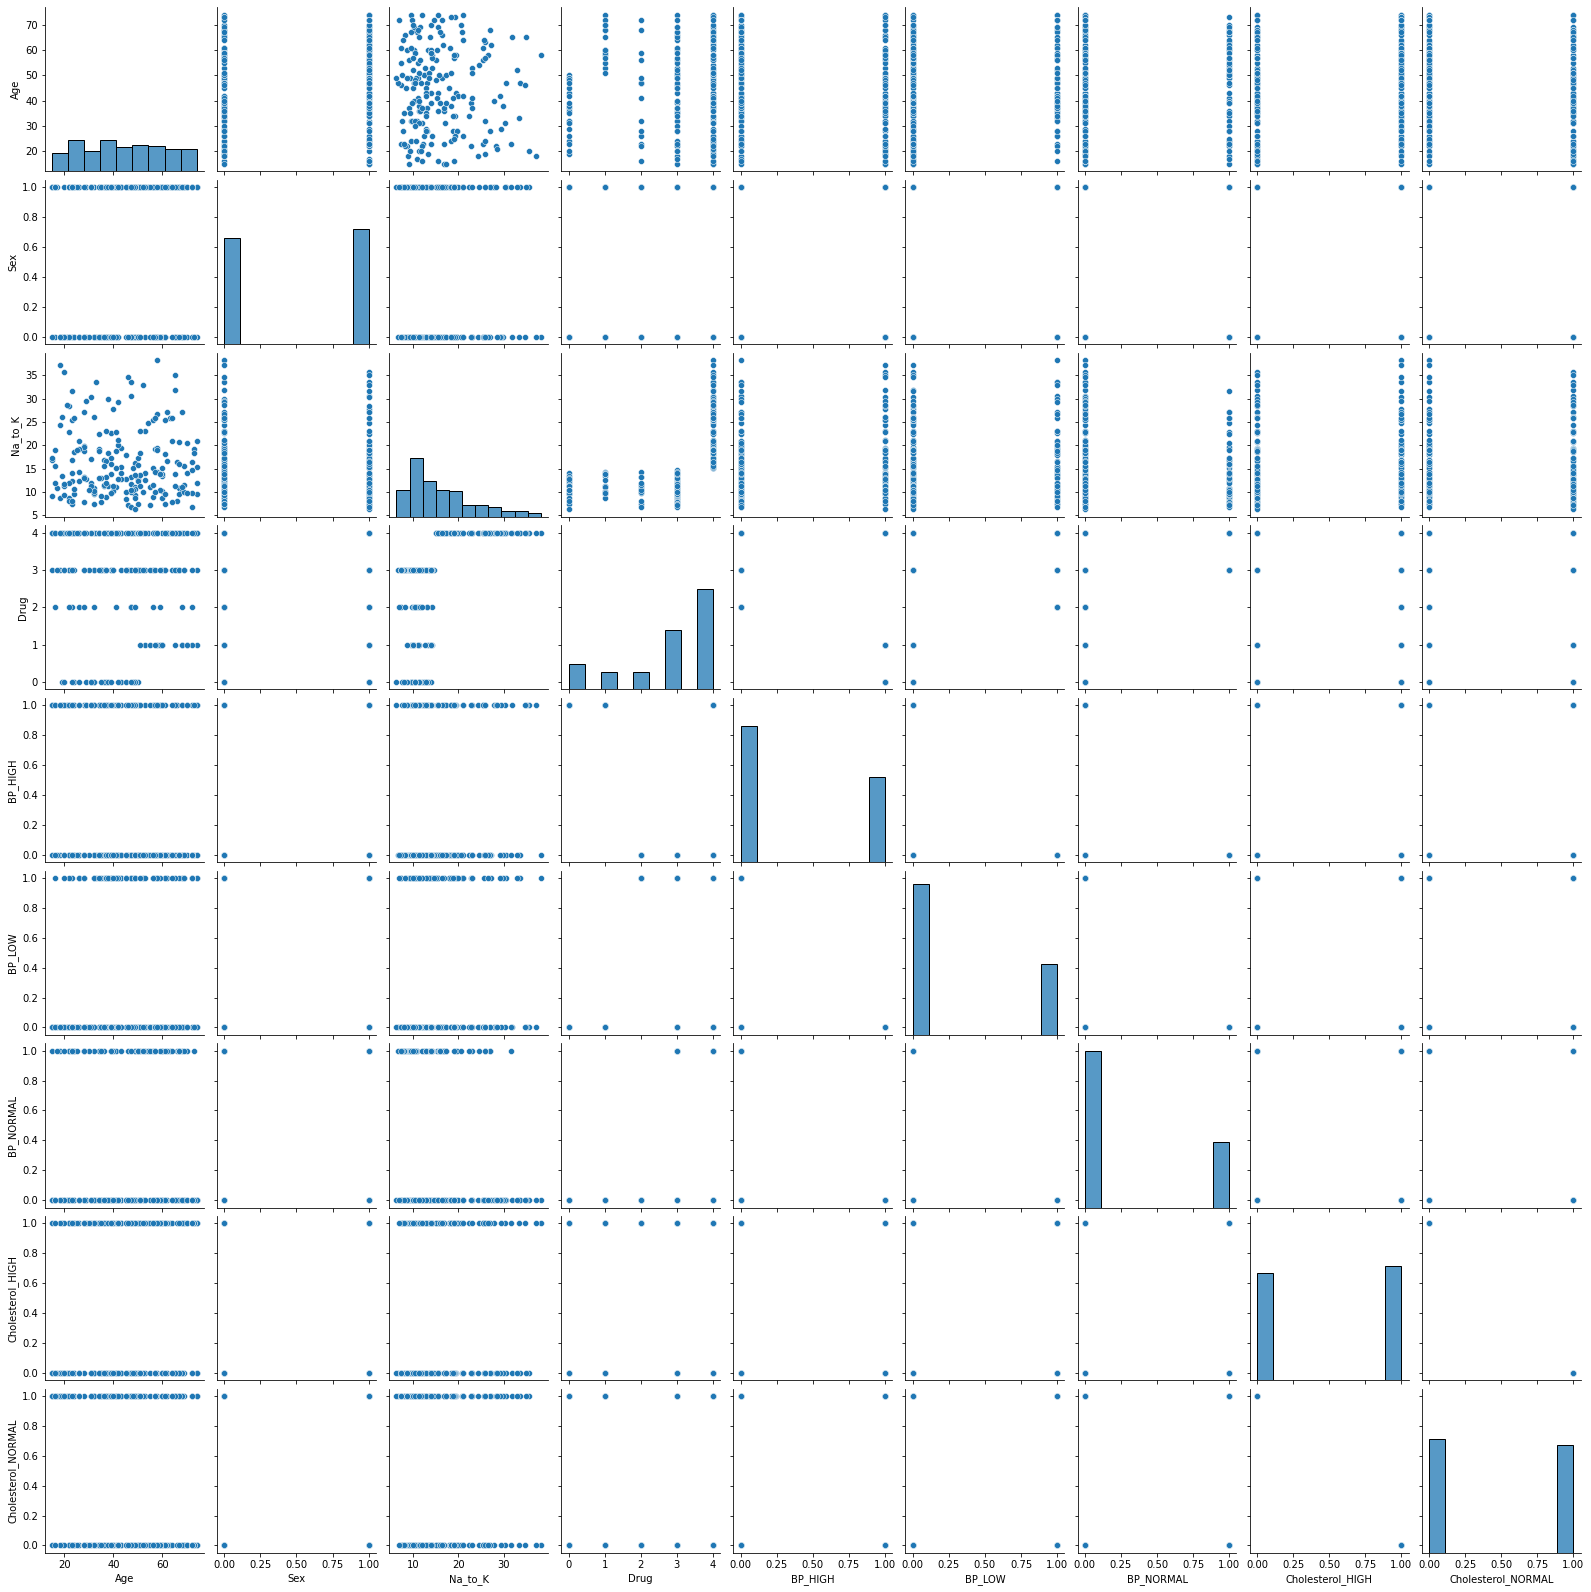

In [32]:
plt.figure(figsize=(15,6))
sns.pairplot(df)

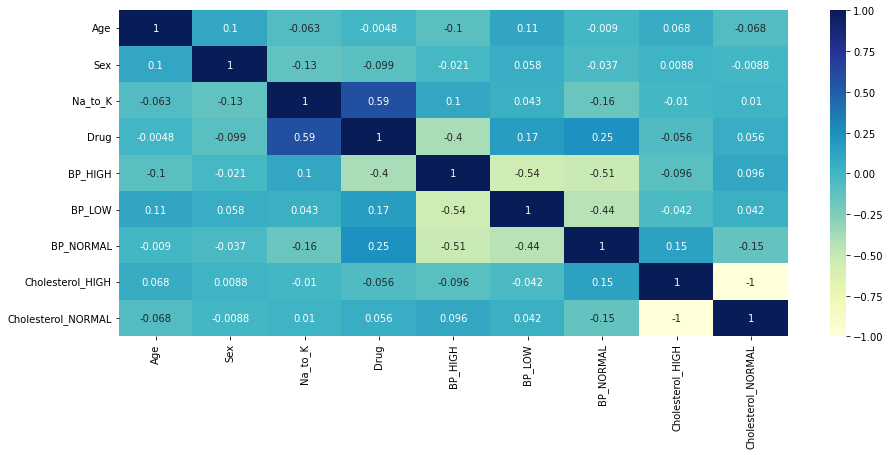

In [31]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [35]:
OutlierFactor = LocalOutlierFactor()
predict_outlier = OutlierFactor.fit_predict(df)
df['check_outlier'] = predict_outlier.tolist()
df = df[df['check_outlier'] == 1].reset_index(drop=True).drop(['check_outlier'], axis=1)
df


,Age,Sex,Na_to_K,Drug,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL
0,23,0,25.355,4,1,0,0,1,0
1,47,1,13.093,2,0,1,0,1,0
2,47,1,10.114,2,0,1,0,1,0
3,28,0,7.798,3,0,0,1,1,0
4,61,0,18.043,4,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
194,56,0,11.567,2,0,1,0,1,0
195,16,1,12.006,2,0,1,0,1,0
196,52,1,9.894,3,0,0,1,1,0
197,23,1,14.020,3,0,0,1,0,1


In [37]:
features = ["Age","Sex","Na_to_K","BP_HIGH","BP_LOW","BP_NORMAL","Cholesterol_HIGH","Cholesterol_NORMAL"]
X = df.loc[:, features]
y = df.loc[:, 'Drug']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=25)

In [38]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((159, 8), (40, 8), (159,), (40,))

In [39]:
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()
X_train_scalar = scalar.fit_transform(X_train)
X_test_scalar = scalar.fit_transform(X_test)

mean = 0.8541666666666666
std = 0.07905694150420949
accuracy_score =  0.975
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       0.93      1.00      0.96        13
           4       1.00      0.94      0.97        16

    accuracy                           0.97        40
   macro avg       0.99      0.99      0.99        40
weighted avg       0.98      0.97      0.98        40



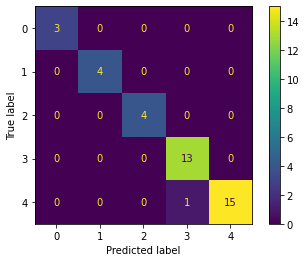

In [40]:
svm_model = SVC()
kfold = model_selection.KFold(n_splits=10)
cv = model_selection.cross_val_score(svm_model, X_train_scalar, y_train, cv=kfold)
cv_mean = cv.mean()
cv_std = cv.std()
print('mean =',cv_mean)
print('std =',cv_std)
svm_model.fit(X_train_scalar, y_train)
y_pred_model =svm_model.predict(X_test_scalar)
print('accuracy_score = ',accuracy_score(y_test, y_pred_model))
print(classification_report(y_test, y_pred_model))
plot_confusion_matrix(svm_model, X_test_scalar, y_test)
plt.show()
